In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('country_vaccinations.csv')
whr21 = pd.read_excel('DataPanelWHR2021C2.xls')
whr21_2020 = whr21[whr21['year']==2019]

In [3]:
# Extract fully vaccinated per hundred as of April 1-11, whatever is the highest.
fv = df[(df['date']>='2021-04-01') & (df['date']<='2021-04-11')]
fv = fv[['country','people_fully_vaccinated_per_hundred']]
fv = fv.groupby('country').max().dropna()
fv

,people_fully_vaccinated_per_hundred
country,
Argentina,1.57
Austria,6.10
Azerbaijan,3.92
Bahrain,21.27
Belgium,5.22
...,...
United Kingdom,9.64
United States,20.39
Uruguay,5.46


In [4]:
# Extract vaccinated per hundred as of April 1-11, whatever is the highest.
v = df[(df['date']>='2021-04-01') & (df['date']<='2021-04-11')]
v = v[['country','people_vaccinated_per_hundred']]
v = v.groupby('country').max().dropna()
v

,people_vaccinated_per_hundred
country,
Afghanistan,0.31
Angola,0.55
Argentina,9.39
Austria,15.52
Azerbaijan,6.63
...,...
Uzbekistan,0.10
Venezuela,0.34
Vietnam,0.06


In [5]:
# Extract average daily vaccinations per million between April 1 and 7
dv = df[(df['date']>='2021-04-01') & (df['date']<='2021-04-07')]
dv = dv[['date','country','daily_vaccinations_per_million']].dropna()
dv = dv.groupby('country').mean()
dv

,daily_vaccinations_per_million
country,
Afghanistan,77.000000
Albania,5293.857143
Andorra,2550.000000
Angola,210.666667
Argentina,2022.000000
...,...
Uzbekistan,174.000000
Venezuela,391.000000
Vietnam,10.428571


Now, combine these three tables into one table, then combine with WHR data

In [6]:
vac_data = pd.merge(fv, v, on='country', how='outer')
vac_data = pd.merge(vac_data, dv, on='country', how='outer')
vac_data.columns = ['fully_vac_per_100', 'vac_per_100', 'avg_daily_vacc_per_million']

In [7]:
vac_data

,fully_vac_per_100,vac_per_100,avg_daily_vacc_per_million
country,,,
Argentina,1.57,9.39,2022.000000
Austria,6.10,15.52,3452.571429
Azerbaijan,3.92,6.63,4309.142857
Bahrain,21.27,32.75,7100.000000
Belgium,5.22,14.47,3958.000000
...,...,...,...
Mongolia,NaN,NaN,4927.714286
Qatar,NaN,NaN,8346.714286
Saint Lucia,NaN,NaN,847.142857


In [8]:
hap_vac = pd.merge(vac_data, whr21_2020, left_on='country', right_on='Country name')
hap_vac

,fully_vac_per_100,vac_per_100,avg_daily_vacc_per_million,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,1.57,9.39,2022.000000,Argentina,2019,6.085561,10.000340,0.896371,69.000000,0.817053,-0.210719,0.830460,0.825965,0.319055
1,6.10,15.52,3452.571429,Austria,2019,7.195361,10.939381,0.964489,73.300003,0.903428,0.059686,0.457089,0.774459,0.205170
2,3.92,6.63,4309.142857,Azerbaijan,2019,5.173389,9.575251,0.886756,65.800003,0.854249,-0.214163,0.457261,0.642547,0.163920
3,21.27,32.75,7100.000000,Bahrain,2019,7.098012,10.714991,0.877929,69.300003,0.906536,0.047863,NaN,0.761623,0.317106
4,5.22,14.47,3958.000000,Belgium,2019,6.772138,10.853364,0.884230,72.199997,0.776204,-0.171521,0.672498,0.733456,0.243631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,NaN,NaN,23.000000,Egypt,2019,4.327832,9.372736,0.772129,62.000000,0.773951,-0.198710,NaN,0.516831,0.312763
101,NaN,NaN,192.333333,Guinea,2019,4.767684,7.849340,0.655124,55.500000,0.691399,0.096817,0.755585,0.684647,0.473388
102,NaN,NaN,4927.714286,Mongolia,2019,5.562905,9.418149,0.945758,62.500000,0.710675,0.148912,0.873167,0.707434,0.166921
103,NaN,NaN,3730.571429,Saudi Arabia,2019,6.561247,10.757097,0.911718,66.599998,0.891087,-0.146843,NaN,0.731764,0.237737


In [9]:
# Missing about 40 countries in WHR, will look into later

# Vaccination Rate (average daily vaccines per million in the week of April 1-7)

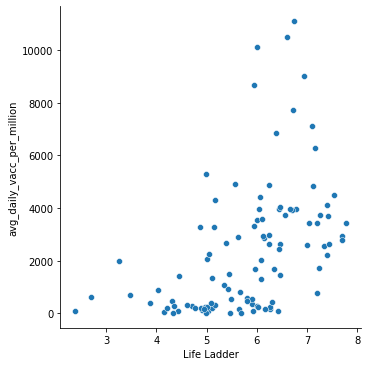

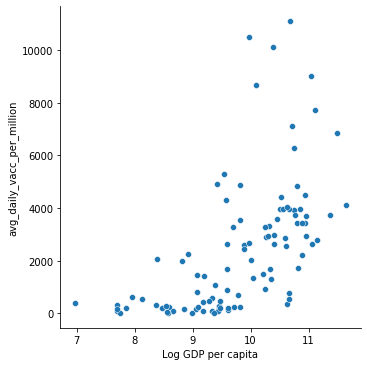

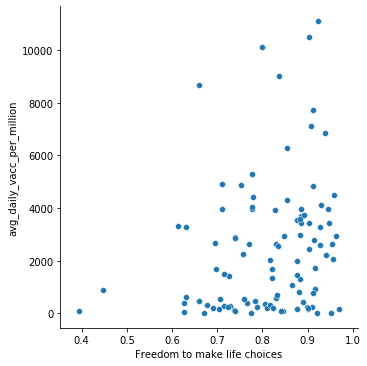

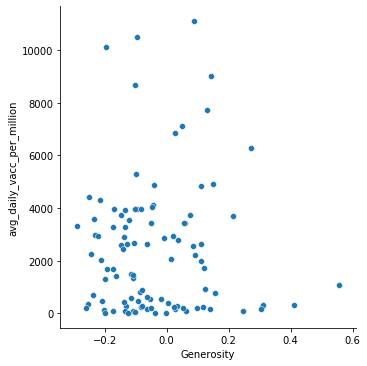

In [56]:
sns.relplot(data=hap_vac.dropna(subset=['avg_daily_vacc_per_million']), x='Life Ladder', y='avg_daily_vacc_per_million')
sns.relplot(data=hap_vac.dropna(subset=['avg_daily_vacc_per_million']), x='Log GDP per capita', y='avg_daily_vacc_per_million')
sns.relplot(data=hap_vac.dropna(subset=['avg_daily_vacc_per_million']), x='Freedom to make life choices', y='avg_daily_vacc_per_million')
sns.relplot(data=hap_vac.dropna(subset=['avg_daily_vacc_per_million']), x='Generosity', y='avg_daily_vacc_per_million')

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

Here, I create a linear model of using all the world happiness data features to try to predict the average daily vaccination rate.

In [13]:
dvdata = hap_vac.dropna(subset=['avg_daily_vacc_per_million']).iloc[:,5:14].dropna()
dvdata_ = dvdata.values
dvdatacols = hap_vac.columns[5:14].values.tolist()
dvdatacols.append(hap_vac.columns[2])
dvtarget = hap_vac.dropna(subset=dvdatacols).iloc[:,2]
dvtarget_ = dvtarget.values
linear_model_dv = LinearRegression()
linear_model_dv.fit(X=dvdata_, y=dvtarget_)

dvresults = pd.DataFrame()
dvresults['country'] = hap_vac.dropna(subset=dvdatacols).iloc[:,3]
dvresults['actual_daily_vac_pm'] = dvtarget
dvresults['predicted_daily_vac_pm'] = linear_model_dv.predict(dvdata_)
print('Linear model')
print('MSE: ', mean_squared_error(dvresults['actual_daily_vac_pm'], dvresults['predicted_daily_vac_pm']))
print('r^2: ', r2_score(dvresults['actual_daily_vac_pm'], dvresults['predicted_daily_vac_pm']))

Linear model
MSE:  4029171.6378128505
r^2:  0.32292200829964957


### We now make a quadratic model and see if it performs any better.

In [14]:
#quad_dvdata = PolynomialFeatures(2, include_bias=False).fit_transform(dvdata_)
quad_dvdata = np.hstack([dvdata_**(i+1) for i in range(2)])
quad_model_dv = LinearRegression()
quad_model_dv.fit(X=quad_dvdata, y=dvtarget_)
dvresults['predicted_daily_vac_pm_quad'] = quad_model_dv.predict(quad_dvdata)
print('Quadratic model')
print('MSE: ', mean_squared_error(dvresults['actual_daily_vac_pm'], dvresults['predicted_daily_vac_pm_quad']))
print('r^2: ', r2_score(dvresults['actual_daily_vac_pm'], dvresults['predicted_daily_vac_pm_quad']))

Quadratic model
MSE:  3532308.085192138
r^2:  0.40641693147451574


In [15]:
dvresults

,country,actual_daily_vac_pm,predicted_daily_vac_pm,predicted_daily_vac_pm_quad
0,Argentina,2022.000000,2821.700687,3224.080845
1,Austria,3452.571429,4017.890762,4888.191767
2,Azerbaijan,4309.142857,1611.200464,1515.325917
4,Belgium,3958.000000,3839.546412,4046.226600
5,Bolivia,813.428571,1717.699204,1316.558155
...,...,...,...,...
96,Vietnam,10.428571,849.548617,461.066430
97,Albania,5293.857143,1519.359173,988.190710
98,Australia,1731.000000,3825.013805,3902.085981
101,Guinea,192.333333,225.259060,702.693501


Creating some visualizations to see how the linear and quadratic models performed. The first plot shows the predicted vaccination rate againt the actual vaccination rate. The second plot shows the residuals.

Text(0.5, 1.0, 'All parameters')

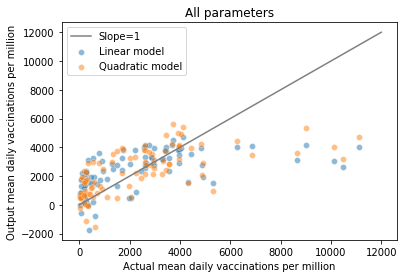

In [86]:
dvresults['residual'] = dvresults['predicted_daily_vac_pm'] -  dvresults['actual_daily_vac_pm']
dvresults['quad_residual'] = dvresults['predicted_daily_vac_pm_quad'] -  dvresults['actual_daily_vac_pm']
sns.scatterplot(data=dvresults, x='actual_daily_vac_pm', y='predicted_daily_vac_pm', alpha=0.5)
sns.scatterplot(data=dvresults, x='actual_daily_vac_pm', y='predicted_daily_vac_pm_quad', alpha=0.5)
plt.plot(np.linspace(0,12000,12000),np.linspace(0,12000,12000), color='gray')
plt.legend(['Slope=1','Linear model','Quadratic model'])
plt.xlabel('Actual mean daily vaccinations per million')
plt.ylabel('Output mean daily vaccinations per million')
plt.title('All parameters')

Text(0, 0.5, 'Residual')

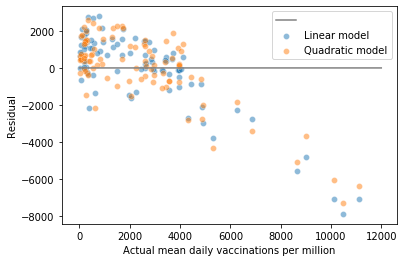

In [87]:
sns.scatterplot(data=dvresults, x='actual_daily_vac_pm', y='residual', alpha=0.5)
sns.scatterplot(data=dvresults, x='actual_daily_vac_pm', y='quad_residual', alpha=0.5)
plt.plot(np.linspace(0,12000,12000),np.zeros(12000), color='gray')
plt.legend(['','Linear model','Quadratic model'])
plt.xlabel('Actual mean daily vaccinations per million')
plt.ylabel('Residual')

In [18]:
linear_model_dv.coef_

array([ 2.76931041e+02,  1.17432998e+03,  2.39939696e+03, -3.05685173e+00,
       -1.08269076e+03,  3.34116211e+02,  7.15390005e+01, -6.89641253e+02,
        3.24739066e+03])

In [19]:
quad_model_dv.coef_

array([ 2.40117175e+03, -5.14611925e+03, -6.52723662e+04,  8.82973482e+02,
       -4.43110429e+03,  5.52252635e+02,  6.17992166e+03,  1.75925126e+04,
        1.26703817e+04, -2.32148928e+02,  3.45774303e+02,  4.53832055e+04,
       -6.92633413e+00,  1.32789566e+03, -4.13038147e+03, -5.10408661e+03,
       -1.10235906e+04, -1.25746768e+04])

The quadratic model fits a little bit better. Let's check the p-values for each paremeter in each model to see which coefficients are significant. This kind of analysis isn't in sklearn, so I will use the regressors package.

In [20]:
from regressors import stats
print("coef_pval:\n", stats.coef_pval(linear_model_dv, dvdata_, dvtarget_))
xlabels = ['Ladder','Log GDP per cap', 'Social support', 'Life expectancy', 'Freedom', 'Generosity', 'Percep. corruption', '+ affect', '- affect']
stats.summary(linear_model_dv, dvdata_, dvtarget_, xlabels)

coef_pval:
 [0.00730374 0.37118262 0.00684201 0.49784056 0.83001668 0.71115559
 0.82008541 0.95439796 0.78957635 0.347984  ]
Residuals:
       Min        1Q   Median        3Q       Max
-7894.2514 -324.4162 417.6394 1266.7996 2795.0964


Coefficients:
                        Estimate   Std. Error  t value   p value
_intercept         -12117.971360  4418.809644  -2.7424  0.007304
Ladder                276.931041   308.194024   0.8986  0.371183
Log GDP per cap      1174.329983   424.636832   2.7655  0.006842
Social support       2399.396960  3525.767070   0.6805  0.497841
Life expectancy        -3.056852    14.199529  -0.2153  0.830017
Freedom             -1082.690757  2914.951085  -0.3714  0.711156
Generosity            334.116211  1464.957365   0.2281  0.820085
Percep. corruption     71.539001  1247.679902   0.0573  0.954398
+ affect             -689.641253  2576.919412  -0.2676  0.789576
- affect             3247.390662  3442.860350   0.9432  0.347984
---
R-squared:  0.32292,    Adjus

In [21]:
print("coef_pval:\n", stats.coef_pval(quad_model_dv, quad_dvdata, dvtarget_))
xlabelsq = xlabels + [s + '^2' for s in xlabels]
stats.summary(quad_model_dv, quad_dvdata, dvtarget_, xlabelsq)

coef_pval:
 [9.95218312e-01 1.20980440e-01 2.37305530e-01 3.61669244e-03
 4.56319584e-08 8.70062886e-01 7.06640817e-01 2.09920445e-01
 3.23276907e-01 3.62556934e-01 1.54442521e-08 0.00000000e+00
 2.77368102e-05 0.00000000e+00 9.10703849e-01 4.59801016e-01
 1.44700904e-01 2.68874543e-01 6.91227622e-01]
Residuals:
       Min        1Q   Median        3Q       Max
-7303.5646 -573.6884 360.8333 1243.0773 2584.5288


Coefficients:
                          Estimate    Std. Error   t value   p value
_intercept             -164.122407  27312.978030   -0.0060  0.995218
Ladder                 2401.171752   1534.450056    1.5648  0.120980
Log GDP per cap       -5146.119251   4326.907189   -1.1893  0.237306
Social support       -65272.366217  21868.329788   -2.9848  0.003617
Life expectancy         882.973482    148.388304    5.9504  0.000000
Freedom               -4431.104291  27014.653516   -0.1640  0.870063
Generosity              552.252635   1462.856818    0.3775  0.706641
Percep. corruption

Limit to a few more likely significant features:
1. Log GDP per cap
2. Social support
3. Perceptions of corruption
4. Life ladder

In [22]:
small_model = dvdata_[:,[0,1,2,6]]
small_linear_model_dv = LinearRegression()
small_linear_model_dv.fit(X=small_model, y=dvtarget_)

dvresults['predicted_daily_vac_pm_small'] = small_linear_model_dv.predict(small_model)
print('Small linear model')
print('MSE: ', mean_squared_error(dvresults['actual_daily_vac_pm'], dvresults['predicted_daily_vac_pm_small']))
print('r^2: ', r2_score(dvresults['actual_daily_vac_pm'], dvresults['predicted_daily_vac_pm_small']))

Small linear model
MSE:  4098709.569513234
r^2:  0.31123657829690854


The small model did just as well as the linear model with more terms. Now I will make a larger quadratic model with these terms.

In [23]:
#small_quad_dvdata = PolynomialFeatures(2, include_bias=False).fit_transform(small_model)
small_quad_dvdata = np.hstack([small_model**(i+1) for i in range(2)])
small_quad_model_dv = LinearRegression()
small_quad_model_dv.fit(X=small_quad_dvdata, y=dvtarget_)
dvresults['predicted_daily_vac_pm_quad_s'] = small_quad_model_dv.predict(small_quad_dvdata)
print('Small Quadratic model')
print('MSE: ', mean_squared_error(dvresults['actual_daily_vac_pm'], dvresults['predicted_daily_vac_pm_quad_s']))
print('r^2: ', r2_score(dvresults['actual_daily_vac_pm'], dvresults['predicted_daily_vac_pm_quad_s']))

Small Quadratic model
MSE:  3674106.793278056
r^2:  0.3825885138425892


Text(0.5, 1.0, 'Selected parameters')

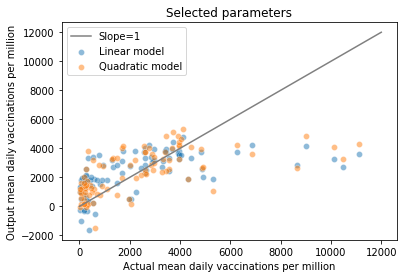

In [84]:
dvresults['small_residual'] = dvresults['predicted_daily_vac_pm_small'] -  dvresults['actual_daily_vac_pm']
dvresults['quad_residual_s'] = dvresults['predicted_daily_vac_pm_quad_s'] -  dvresults['actual_daily_vac_pm']
sns.scatterplot(data=dvresults, x='actual_daily_vac_pm', y='predicted_daily_vac_pm_small', alpha=.5)
sns.scatterplot(data=dvresults, x='actual_daily_vac_pm', y='predicted_daily_vac_pm_quad_s', alpha=.5)
#sns.scatterplot(data=dvresults, x='actual_daily_vac_pm', y='predicted_daily_vac_pm_quad', alpha=0.5)
plt.plot(np.linspace(0,12000,12000),np.linspace(0,12000,12000), color='gray')
plt.legend(['Slope=1','Linear model','Quadratic model'])
plt.xlabel('Actual mean daily vaccinations per million')
plt.ylabel('Output mean daily vaccinations per million')
plt.title('Selected parameters')

Text(0, 0.5, 'Residual')

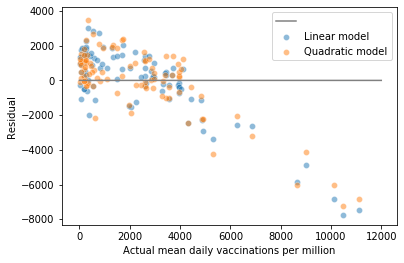

In [88]:
sns.scatterplot(data=dvresults, x='actual_daily_vac_pm', y='small_residual', alpha=0.5)
sns.scatterplot(data=dvresults, x='actual_daily_vac_pm', y='quad_residual_s', alpha=0.5)
plt.plot(np.linspace(0,12000,12000),np.zeros(12000), color='gray')
plt.legend(['','Linear model','Quadratic model'])
plt.xlabel('Actual mean daily vaccinations per million')
plt.ylabel('Residual')

In [65]:
xlabels_s = ['Life ladder', 'Log GDP per capita', 'Social support', 'Perceptions of Corruption']
print("coef_pval:\n", stats.coef_pval(small_quad_model_dv, small_quad_dvdata, dvtarget_))
xlabels_sq = xlabels_s + [s + '^2' for s in xlabels_s]
stats.summary(small_quad_model_dv, small_quad_dvdata, dvtarget_, xlabels_sq)

coef_pval:
 [1.12485567e-01 1.23558818e-01 1.40955552e-03 8.13391002e-03
 5.57809783e-02 2.59527092e-07 0.00000000e+00 1.76125516e-04
 5.89572151e-02]
Residuals:
       Min        1Q   Median       3Q       Max
-7260.1768 -354.8138 324.1727 1127.321 3476.0356


Coefficients:
                                 Estimate    Std. Error  t value   p value
_intercept                   27677.823022  17275.806905   1.6021  0.112486
Life ladder                   2116.528419   1362.038344   1.5539  0.123559
Log GDP per capita           -4715.418072   1433.098493  -3.2904  0.001410
Social support              -51943.128063  19210.193751  -2.7039  0.008134
Perceptions of Corruption     9153.099054   4726.048977   1.9367  0.055781
Life ladder^2                 -187.980565     33.852424  -5.5529  0.000000
Log GDP per capita^2           312.019473     10.749881  29.0254  0.000000
Social support^2             35703.895949   9138.720182   3.9069  0.000176
Perceptions of Corruption^2  -6547.813579   3425.

In [66]:
print("coef_pval:\n", stats.coef_pval(small_linear_model_dv, small_model, dvtarget_))
stats.summary(small_linear_model_dv, small_model, dvtarget_, xlabels_s)

coef_pval:
 [1.06789035e-04 3.91936747e-01 2.26707542e-13 8.55210562e-01
 6.46851489e-01]
Residuals:
       Min        1Q   Median        3Q       Max
-7749.5498 -482.3519 409.4944 1375.3737 2998.8473


Coefficients:
                               Estimate   Std. Error  t value   p value
_intercept                -11428.018323  2824.470865  -4.0461  0.000107
Life ladder                  215.852912   250.970273   0.8601  0.391937
Log GDP per capita          1192.469535   139.551718   8.5450  0.000000
Social support               579.060735  3164.673330   0.1830  0.855211
Perceptions of Corruption    509.797048  1109.174917   0.4596  0.646851
---
R-squared:  0.31124,    Adjusted R-squared:  0.28062
F-statistic: 10.17 on 4 features


# Total vaccinations per hundred

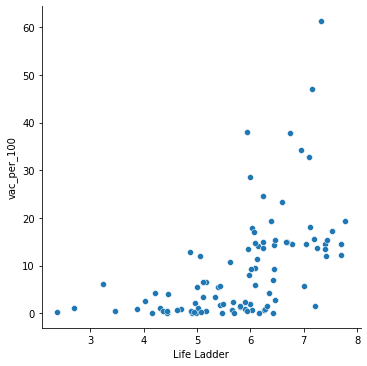

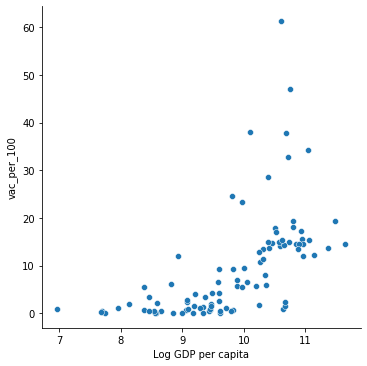

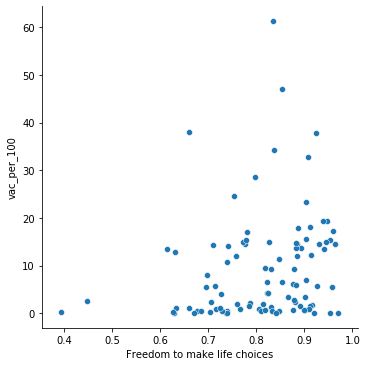

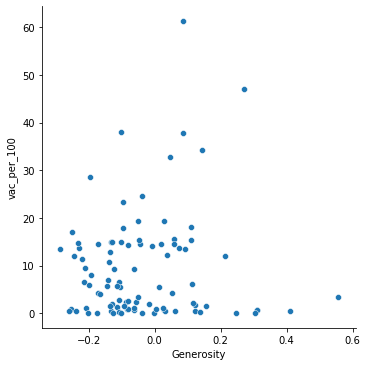

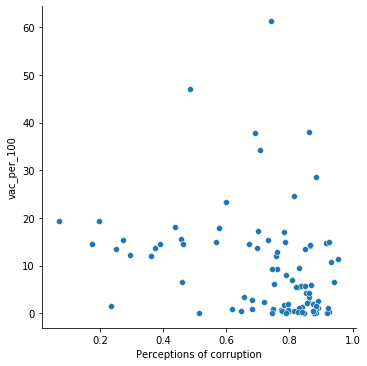

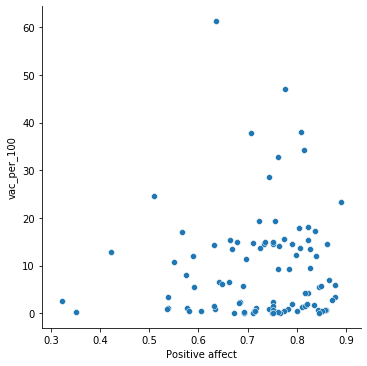

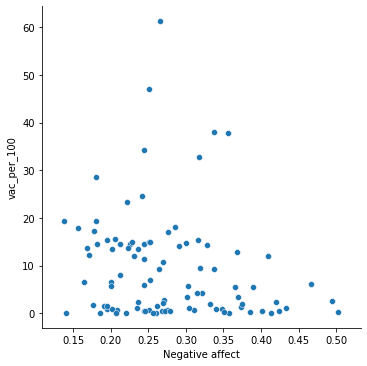

In [27]:
sns.relplot(data=hap_vac.dropna(subset=['vac_per_100']), x='Life Ladder', y='vac_per_100')
sns.relplot(data=hap_vac.dropna(subset=['vac_per_100']), x='Log GDP per capita', y='vac_per_100')
sns.relplot(data=hap_vac.dropna(subset=['vac_per_100']), x='Freedom to make life choices', y='vac_per_100')
sns.relplot(data=hap_vac.dropna(subset=['vac_per_100']), x='Generosity', y='vac_per_100')
sns.relplot(data=hap_vac.dropna(subset=['vac_per_100']), x='Perceptions of corruption', y='vac_per_100')
sns.relplot(data=hap_vac.dropna(subset=['vac_per_100']), x='Positive affect', y='vac_per_100')
sns.relplot(data=hap_vac.dropna(subset=['vac_per_100']), x='Negative affect', y='vac_per_100')

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [29]:
vdata = hap_vac.dropna(subset=['vac_per_100']).iloc[:,5:].dropna()
vdata_ = vdata.values
vdatacols = hap_vac.columns[5:].values.tolist()
vdatacols.append(hap_vac.columns[1])
vtarget = hap_vac.dropna(subset=vdatacols).iloc[:,1]
vtarget_ = vtarget.values
linear_model_v = LinearRegression()
linear_model_v.fit(X=vdata_, y=vtarget_)

vresults = pd.DataFrame()
vresults['country'] = hap_vac.dropna(subset=vdatacols).iloc[:,3]
vresults['actual_v_per100'] = vtarget
vresults['predicted_v_per100'] = linear_model_v.predict(vdata_)
print('MSE: ', mean_squared_error(vresults['actual_v_per100'], vresults['predicted_v_per100']))
print('r^2: ', r2_score(vresults['actual_v_per100'], vresults['predicted_v_per100']))

MSE:  69.13981340599253
r^2:  0.42557300473089


### Now, we make a quadratic model and see how it performs

In [31]:
#quad_dvdata = PolynomialFeatures(2, include_bias=False).fit_transform(dvdata_)
quad_vdata = np.hstack([vdata_**(i+1) for i in range(2)])
quad_model_v = LinearRegression()
quad_model_v.fit(X=quad_vdata, y=vtarget_)
vresults['predicted_v_per100_q'] = quad_model_v.predict(quad_vdata)
print('Quadratic model')
print('MSE: ', mean_squared_error(vresults['actual_v_per100'], vresults['predicted_v_per100_q']))
print('r^2: ', r2_score(vresults['actual_v_per100'], vresults['predicted_v_per100_q']))

Quadratic model
MSE:  55.96178989772705
r^2:  0.5350585829315182


In [42]:
vresults

,country,actual_v_per100,predicted_v_per100,predicted_v_per100_q,residual,residual_q
0,Argentina,9.39,8.640626,9.781496,-0.749374,-0.749374
1,Austria,15.52,18.282349,24.070811,2.762349,2.762349
2,Azerbaijan,6.63,2.736170,0.965832,-3.893830,-3.893830
4,Belgium,14.47,16.008791,18.762971,1.538791,1.538791
5,Bolivia,2.42,6.555769,3.959925,4.135769,4.135769
...,...,...,...,...,...,...
91,Senegal,1.95,-0.188196,-1.129513,-2.138196,-2.138196
92,Sri Lanka,4.32,1.124421,2.352582,-3.195579,-3.195579
93,Uganda,0.31,1.659425,3.198297,1.349425,1.349425
94,Uzbekistan,0.10,5.777686,4.605819,5.677686,5.677686


Text(0.5, 1.0, 'All parameters')

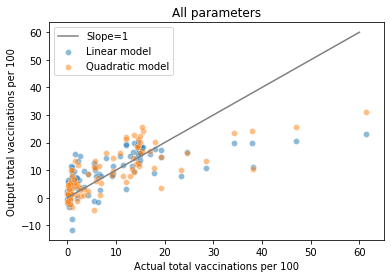

In [91]:
vresults['residual'] = vresults['predicted_v_per100'] -  vresults['actual_v_per100']
vresults['residual_q'] = vresults['predicted_v_per100_q'] -  vresults['actual_v_per100']


sns.scatterplot(data=vresults, x='actual_v_per100', y='predicted_v_per100', alpha=0.5)
sns.scatterplot(data=vresults, x='actual_v_per100', y='predicted_v_per100_q', alpha=0.5)
plt.plot(np.linspace(0,60,5000),np.linspace(0,60,5000), color='gray')
plt.legend(['Slope=1','Linear model','Quadratic model'])
plt.xlabel('Actual total vaccinations per 100')
plt.ylabel('Output total vaccinations per 100')
plt.title('All parameters')

Text(0, 0.5, 'Residual')

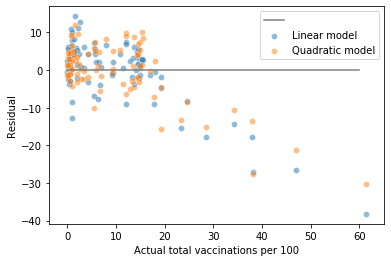

In [90]:
sns.scatterplot(data=vresults, x='actual_v_per100', y='residual', alpha=0.5)
sns.scatterplot(data=vresults, x='actual_v_per100', y='residual_q', alpha=0.5)
plt.plot(np.linspace(0,60,60),np.zeros(60), color='gray')
plt.legend(['','Linear model','Quadratic model'])
plt.xlabel('Actual total vaccinations per 100')
plt.ylabel('Residual')

In [52]:
linear_model_v.coef_

array([  4.20987899,   4.62809273,   7.10323979,  -0.0584833 ,
        -4.33681356,  11.43743181,   4.73334542, -22.19423554,
        14.95128661])

Now we investigate the p-values of each coefficient

In [53]:
print("coef_pval:\n", stats.coef_pval(linear_model_v, vdata_, vtarget_))
xlabels = ['Ladder','Log GDP per cap', 'Social support', 'Life expectancy', 'Freedom', 'Generosity', 'Percep. corruption', '+ affect', '- affect']
stats.summary(linear_model_v, vdata_, vtarget_, xlabels)

coef_pval:
 [0.00825251 0.00150069 0.01029937 0.63679564 0.32943177 0.72255948
 0.06546345 0.37125804 0.04055379 0.32233985]
Residuals:
     Min      1Q  Median     3Q     Max
-38.2156 -1.9932  1.8805 4.6597 14.2861


Coefficients:
                     Estimate  Std. Error  t value   p value
_intercept         -50.009129   18.517342  -2.7007  0.008253
Ladder               4.209879    1.285890   3.2739  0.001501
Log GDP per cap      4.628093    1.766366   2.6201  0.010299
Social support       7.103240   14.992880   0.4738  0.636796
Life expectancy     -0.058483    0.059646  -0.9805  0.329432
Freedom             -4.336814   12.177245  -0.3561  0.722559
Generosity          11.437432    6.134048   1.8646  0.065463
Percep. corruption   4.733345    5.267696   0.8986  0.371258
+ affect           -22.194236   10.682105  -2.0777  0.040554
- affect            14.951287   15.025331   0.9951  0.322340
---
R-squared:  0.42557,    Adjusted R-squared:  0.36253
F-statistic: 6.75 on 9 features


In [54]:
print("coef_pval:\n", stats.coef_pval(quad_model_v, quad_vdata, vtarget_))
stats.summary(quad_model_v, quad_vdata, vtarget_, xlabelsq)

coef_pval:
 [8.73744798e-01 1.44140727e-01 7.94417839e-01 2.46003633e-02
 6.53852577e-01 3.37846645e-01 4.19059097e-02 5.98810301e-03
 3.79221758e-01 5.91906645e-01 5.20246068e-11 1.84287478e-03
 6.98268143e-04 0.00000000e+00 1.40168210e-01 6.88781902e-01
 9.83379998e-03 1.44377798e-01 9.02779073e-01]
Residuals:
     Min      1Q  Median     3Q     Max
-30.3533 -2.3035  1.0676 4.6187 11.9285


Coefficients:
                        Estimate  Std. Error  t value   p value
_intercept             17.517721  109.931064   0.1594  0.873745
Ladder                 -9.087115    6.168174  -1.4732  0.144141
Log GDP per cap        -4.536877   17.359790  -0.2613  0.794418
Social support       -202.377828   88.544929  -2.2856  0.024600
Life expectancy        -0.268847    0.597570  -0.4499  0.653853
Freedom               104.984149  108.960457   0.9635  0.337847
Generosity             12.172590    5.898783   2.0636  0.041906
Percep. corruption     55.479290   19.712247   2.8145  0.005988
+ affect      

Now I will cut down the model to only a few different features that seem significant.
1. Ladder
2. Log GDP per cap
4. Generosity
5. Perceptions of corruption
6. Positive affect

In [55]:
small_model_v = vdata_[:,[0,1,5,6,7]]
small_linear_model_v = LinearRegression()
small_linear_model_v.fit(X=small_model_v, y=vtarget_)

vresults['predicted_v_per100_small'] = small_linear_model_v.predict(small_model_v)
print('Small linear model')
print('MSE: ', mean_squared_error(vresults['actual_v_per100'], vresults['predicted_v_per100_small']))
print('r^2: ', r2_score(vresults['actual_v_per100'], vresults['predicted_v_per100_small']))

Small linear model
MSE:  69.99933250907385
r^2:  0.4184319531220261


In [61]:
small_quad_vdata = np.hstack([small_model_v**(i+1) for i in range(2)])
small_quad_model_v = LinearRegression()
small_quad_model_v.fit(X=small_quad_vdata, y=vtarget_)
vresults['predicted_v_per100_quad_small'] = small_quad_model_v.predict(small_quad_vdata)
print('Small quadratic model')
print('MSE: ', mean_squared_error(vresults['actual_v_per100'], vresults['predicted_v_per100_quad_small']))
print('r^2: ', r2_score(vresults['actual_v_per100'], vresults['predicted_v_per100_quad_small']))

Small quadratic model
MSE:  60.56703733378304
r^2:  0.4967972929909361


Text(0.5, 1.0, 'Selected parameters')

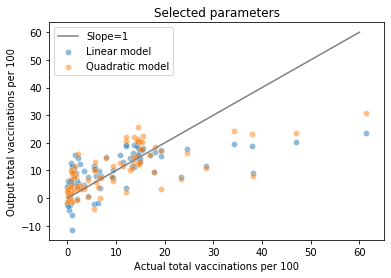

In [92]:
vresults['residual_s'] = vresults['predicted_v_per100_small'] -  vresults['actual_v_per100']
vresults['residual_sq'] = vresults['predicted_v_per100_quad_small'] -  vresults['actual_v_per100']


sns.scatterplot(data=vresults, x='actual_v_per100', y='predicted_v_per100_small', alpha=0.5)
sns.scatterplot(data=vresults, x='actual_v_per100', y='predicted_v_per100_quad_small', alpha=0.5)
plt.plot(np.linspace(0,60,5000),np.linspace(0,60,5000), color='gray')
plt.legend(['Slope=1','Linear model','Quadratic model'])
plt.xlabel('Actual total vaccinations per 100')
plt.ylabel('Output total vaccinations per 100')
plt.title('Selected parameters')

Text(0, 0.5, 'Residual')

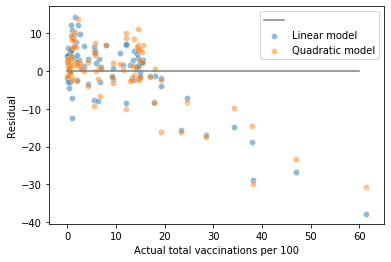

In [93]:
sns.scatterplot(data=vresults, x='actual_v_per100', y='residual_s', alpha=0.5)
sns.scatterplot(data=vresults, x='actual_v_per100', y='residual_sq', alpha=0.5)
plt.plot(np.linspace(0,60,60),np.zeros(60), color='gray')
plt.legend(['','Linear model','Quadratic model'])
plt.xlabel('Actual total vaccinations per 100')
plt.ylabel('Residual')

Now, we investigate the p-value for each coefficient

In [63]:
print("coef_pval:\n", stats.coef_pval(small_linear_model_v, small_model_v, vtarget_))
xlabels = ['Ladder','Log GDP per cap', 'Generosity', 'Perceptions of corruption', '+ affect']
stats.summary(small_linear_model_v, small_model_v, vtarget_, xlabels)

coef_pval:
 [1.40749667e-03 1.14777568e-04 9.19264664e-12 4.31389091e-02
 1.27971322e-01 4.31536351e-03]
Residuals:
    Min      1Q  Median    3Q     Max
-37.804 -1.9595  1.6548 4.517 14.1615


Coefficients:
                            Estimate  Std. Error  t value   p value
_intercept                -44.389712   13.475366  -3.2941  0.001407
Ladder                      4.291480    1.064359   4.0320  0.000115
Log GDP per cap             4.413286    0.564648   7.8160  0.000000
Generosity                 12.517738    6.103138   2.0510  0.043139
Perceptions of corruption   7.292567    4.747301   1.5362  0.127971
+ affect                  -26.519615    9.058625  -2.9276  0.004315
---
R-squared:  0.41843,    Adjusted R-squared:  0.38462
F-statistic: 12.38 on 5 features


In [64]:
print("coef_pval:\n", stats.coef_pval(small_quad_model_v, small_quad_vdata, vtarget_))
xlabels_s = ['Ladder','Log GDP per cap', 'Generosity', 'Perceptions of corruption', '+ affect']
xlabels_sq = xlabels_s + [s + '^2' for s in xlabels_s]
stats.summary(small_quad_model_v, small_quad_vdata, vtarget_, xlabels_sq)

coef_pval:
 [0.94309452 0.03276392 0.17708917 0.03349122 0.00109981 0.21515023
 0.         0.         0.69651121 0.00469574 0.03514411]
Residuals:
     Min      1Q  Median    3Q     Max
-30.6723 -1.9663  1.1853 4.093 13.6985


Coefficients:
                              Estimate  Std. Error  t value   p value
_intercept                    5.462401   76.313547   0.0716  0.943095
Ladder                      -12.013494    5.541145  -2.1681  0.032764
Log GDP per cap              -8.121684    5.970426  -1.3603  0.177089
Generosity                   12.990907    6.017456   2.1589  0.033491
Perceptions of corruption    65.649599   19.473410   3.3712  0.001100
+ affect                     61.131725   48.974868   1.2482  0.215150
Ladder^2                      1.542448    0.138891  11.1055  0.000000
Log GDP per cap^2             0.676661    0.044688  15.1419  0.000000
Generosity^2                 -8.896482   22.737363  -0.3913  0.696511
Perceptions of corruption^2 -40.835774   14.087733  -2.8987